In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from datetime import datetime 
from sklearn.metrics import roc_auc_score as auc 
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [3]:
data=pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.isnull().sum().max()

0

In [7]:
data.shape
b=data.shape[0]

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.shape

(284807, 31)

In [11]:
data.drop_duplicates(subset=data.columns.values[:-1], keep='first',inplace=True)
print(b-data.shape[0]," duplicated Rows has been removed")

1081  duplicated Rows has been removed


In [12]:
data.shape

(283726, 31)

0    283253
1       473
Name: Class, dtype: int64


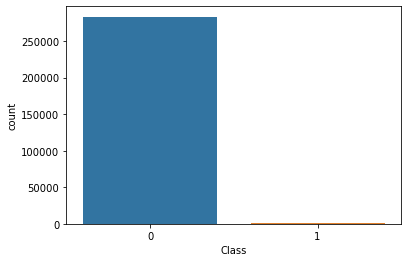

In [13]:
# Class count
print(data['Class'].value_counts())
sns.countplot(data=data, x='Class')

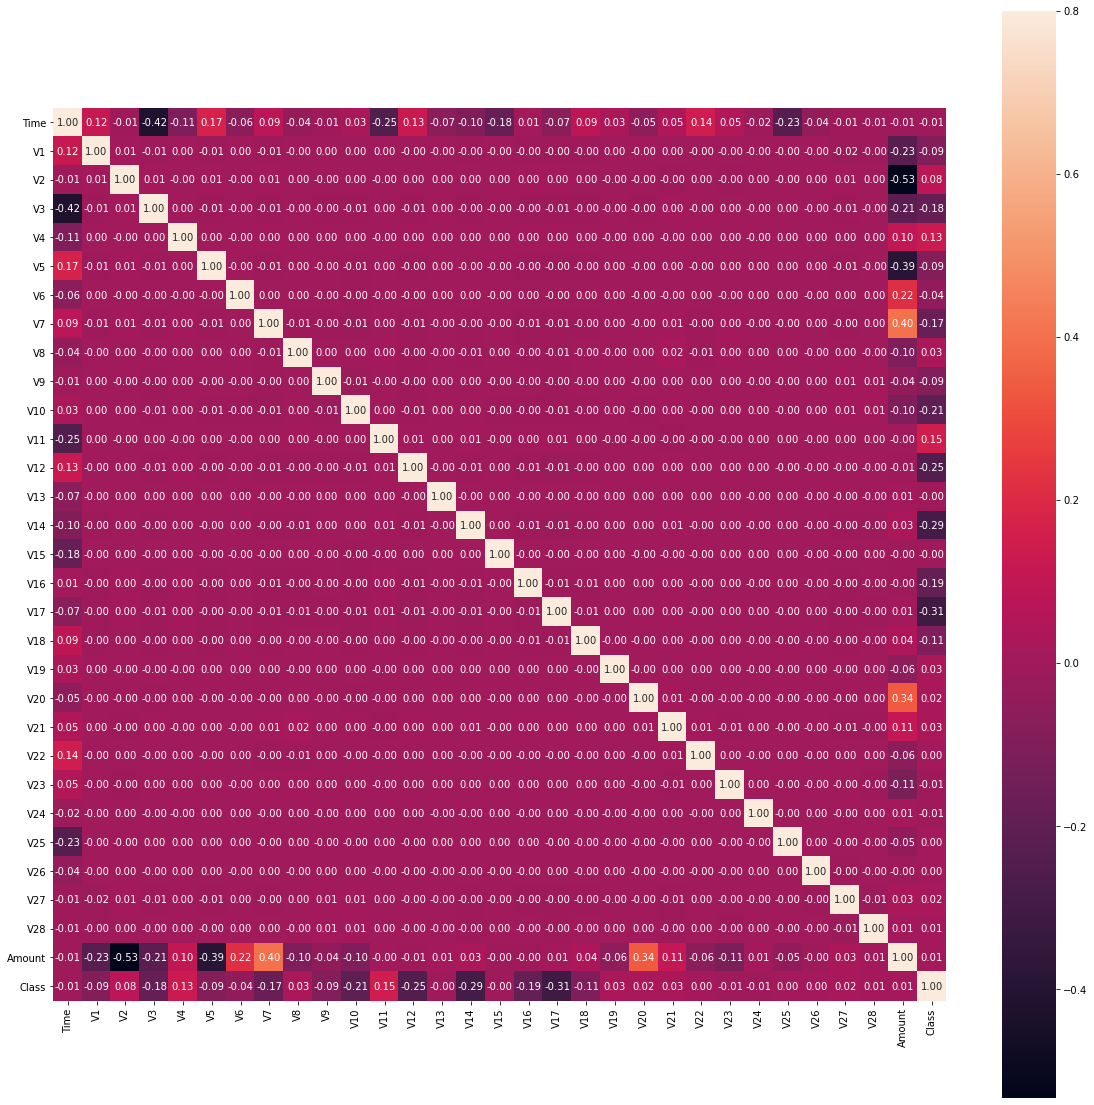

In [14]:
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), vmax=.8 , square=True,annot=True,fmt='.2f')

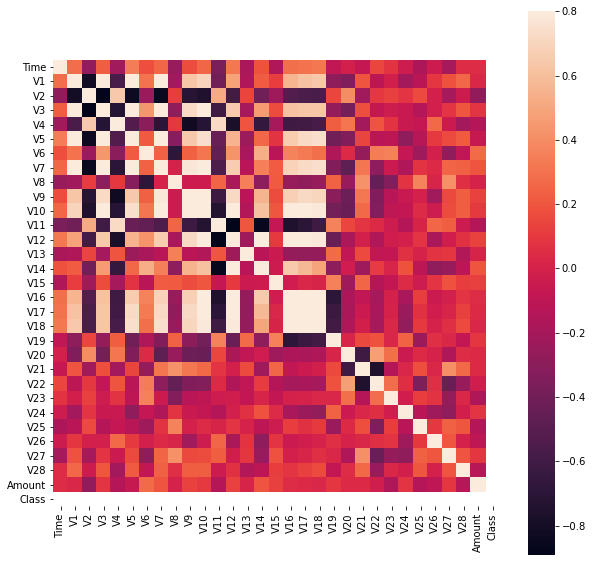

In [15]:
plt.subplots(figsize=(10,10))
sns.heatmap(data.query('Class==1').corr(), vmax=.8 , square=True)

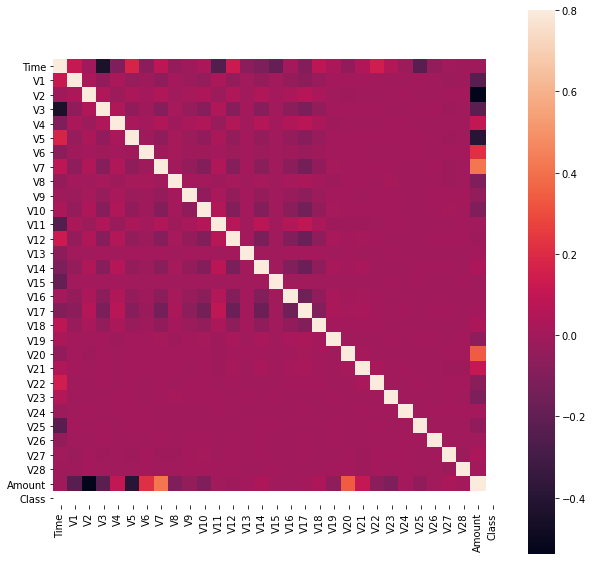

In [16]:
plt.subplots(figsize=(10,10))
sns.heatmap(data.query('Class==0').corr(), vmax=.8 , square=True)

In [17]:
data.corr().nlargest(31,'Class')['Class']

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

<Figure size 432x288 with 0 Axes>

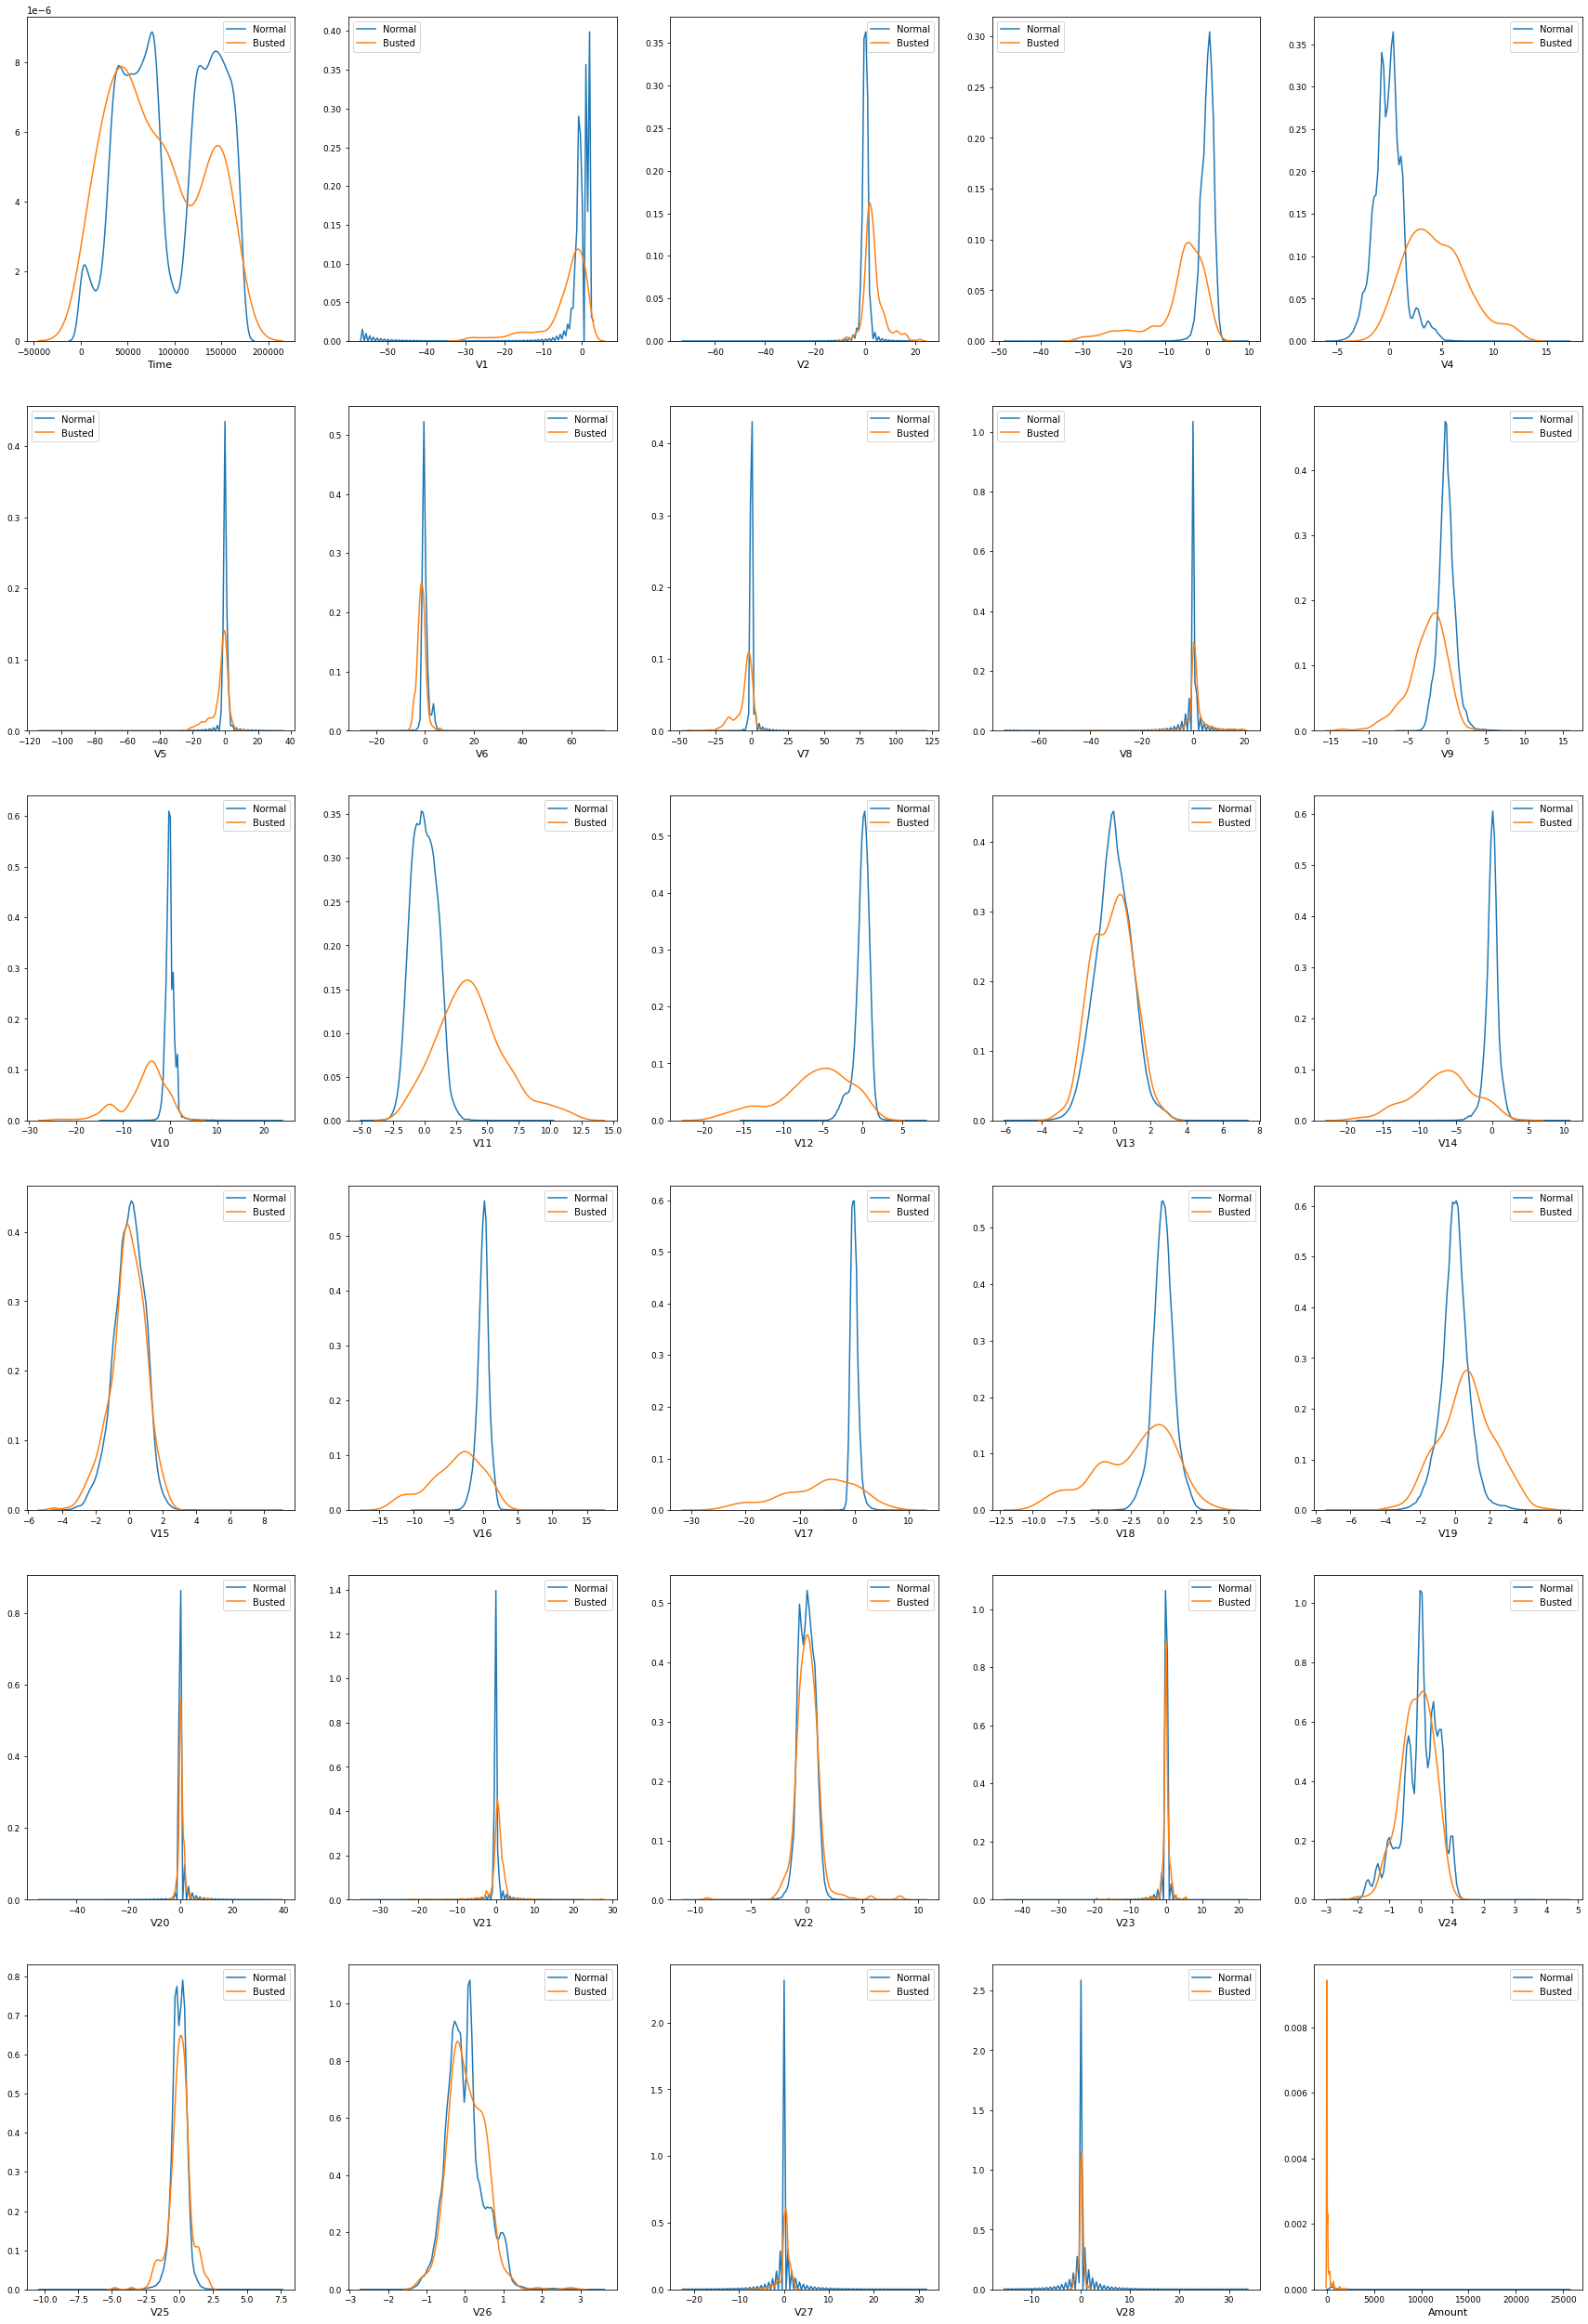

In [18]:
def feature_dist(df0,df1,label0,label1,features):
    plt.figure()
    fig,ax=plt.subplots(6,5,figsize=(30,45))
    i=0
    for ft in features:
        i+=1
        plt.subplot(6,5,i)
        # plt.figure()
        sns.distplot(df0[ft], hist=False,label=label0)
        sns.distplot(df1[ft], hist=False,label=label1)
        plt.xlabel(ft, fontsize=11)
        #locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=9)
        plt.tick_params(axis='y', labelsize=9)
    plt.show()

t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]
features = data.columns.values[:30]
feature_dist(t0,t1 ,'Normal', 'Busted', features)

<Figure size 432x288 with 0 Axes>

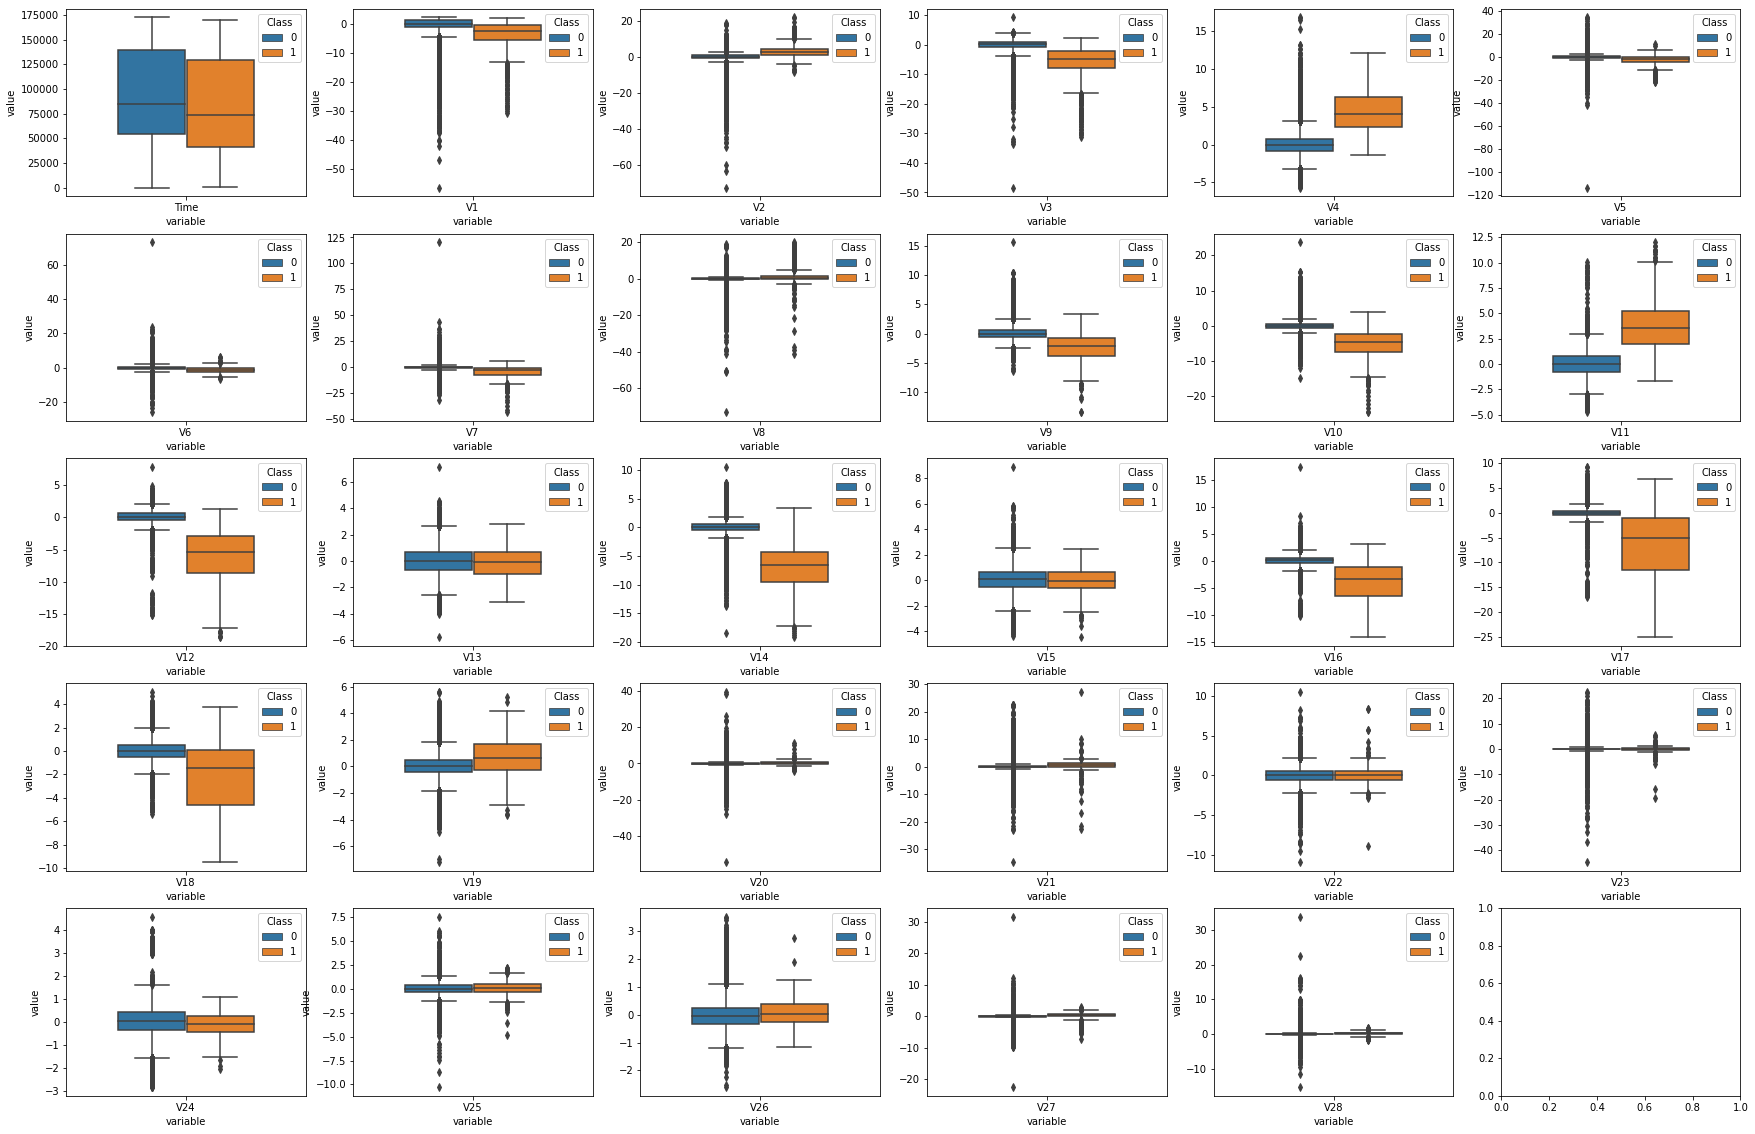

In [19]:
def showboxplot(df,features):
    melted=[]
    plt.figure()
    fig,ax=plt.subplots(5,6,figsize=(30,20))
    i=0
    for n in features:
        melted.insert(i,pd.melt(df,id_vars = "Class",value_vars = [n]))
        i+=1
    for s in np.arange(1,len(melted)):
        plt.subplot(5,6,s)
        sns.boxplot(x = "variable", y = "value", hue="Class",data= melted[s-1])
    plt.show()


showboxplot(data,data.columns.values[:-1])

In [20]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [21]:
X.head()
#Y.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40, shuffle =True)

In [60]:
y_train.value_counts()

Class
0        226600
1           380
dtype: int64

In [98]:
X_train['Class']=y_train

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
def Remove_Outliers(df,features):
    
    
    Positive_df = df[df["Class"] == 1]#1
    Negative_df = df[df["Class"] == 0]#0
    before=df.shape[0]

    for n in features:
        
        desc1 = Positive_df[n].describe()
        lower_bound1 = desc1[4] - 1.5*(desc1[6]-desc1[4])
        upper_bound1 = desc1[6] + 1.5*(desc1[6]-desc1[4])
        
        desc0 = Negative_df[n].describe()
        lower_bound0 = desc0[4] - 1.5*(desc0[6]-desc0[4])
        upper_bound0 = desc0[6] + 1.5*(desc0[6]-desc0[4])

        df=df.drop(df[(((df[n]<lower_bound1) | (df[n]>upper_bound1))
                      &
                      (df['Class']==1))
                      |
                      (((df[n]<lower_bound0) | (df[n]>upper_bound0))
                      &
                      (df['Class']== 0))].index)

    after=df.shape[0]
    print("number of deleted outiers :",before-after)
    return df


a=Remove_Outliers(X_train,X_train.columns.values[:-1])
Xo_train=a.iloc[:,:-1]
yo_train=a.iloc[:,-1]

number of deleted outiers : 110307


<Figure size 432x288 with 0 Axes>

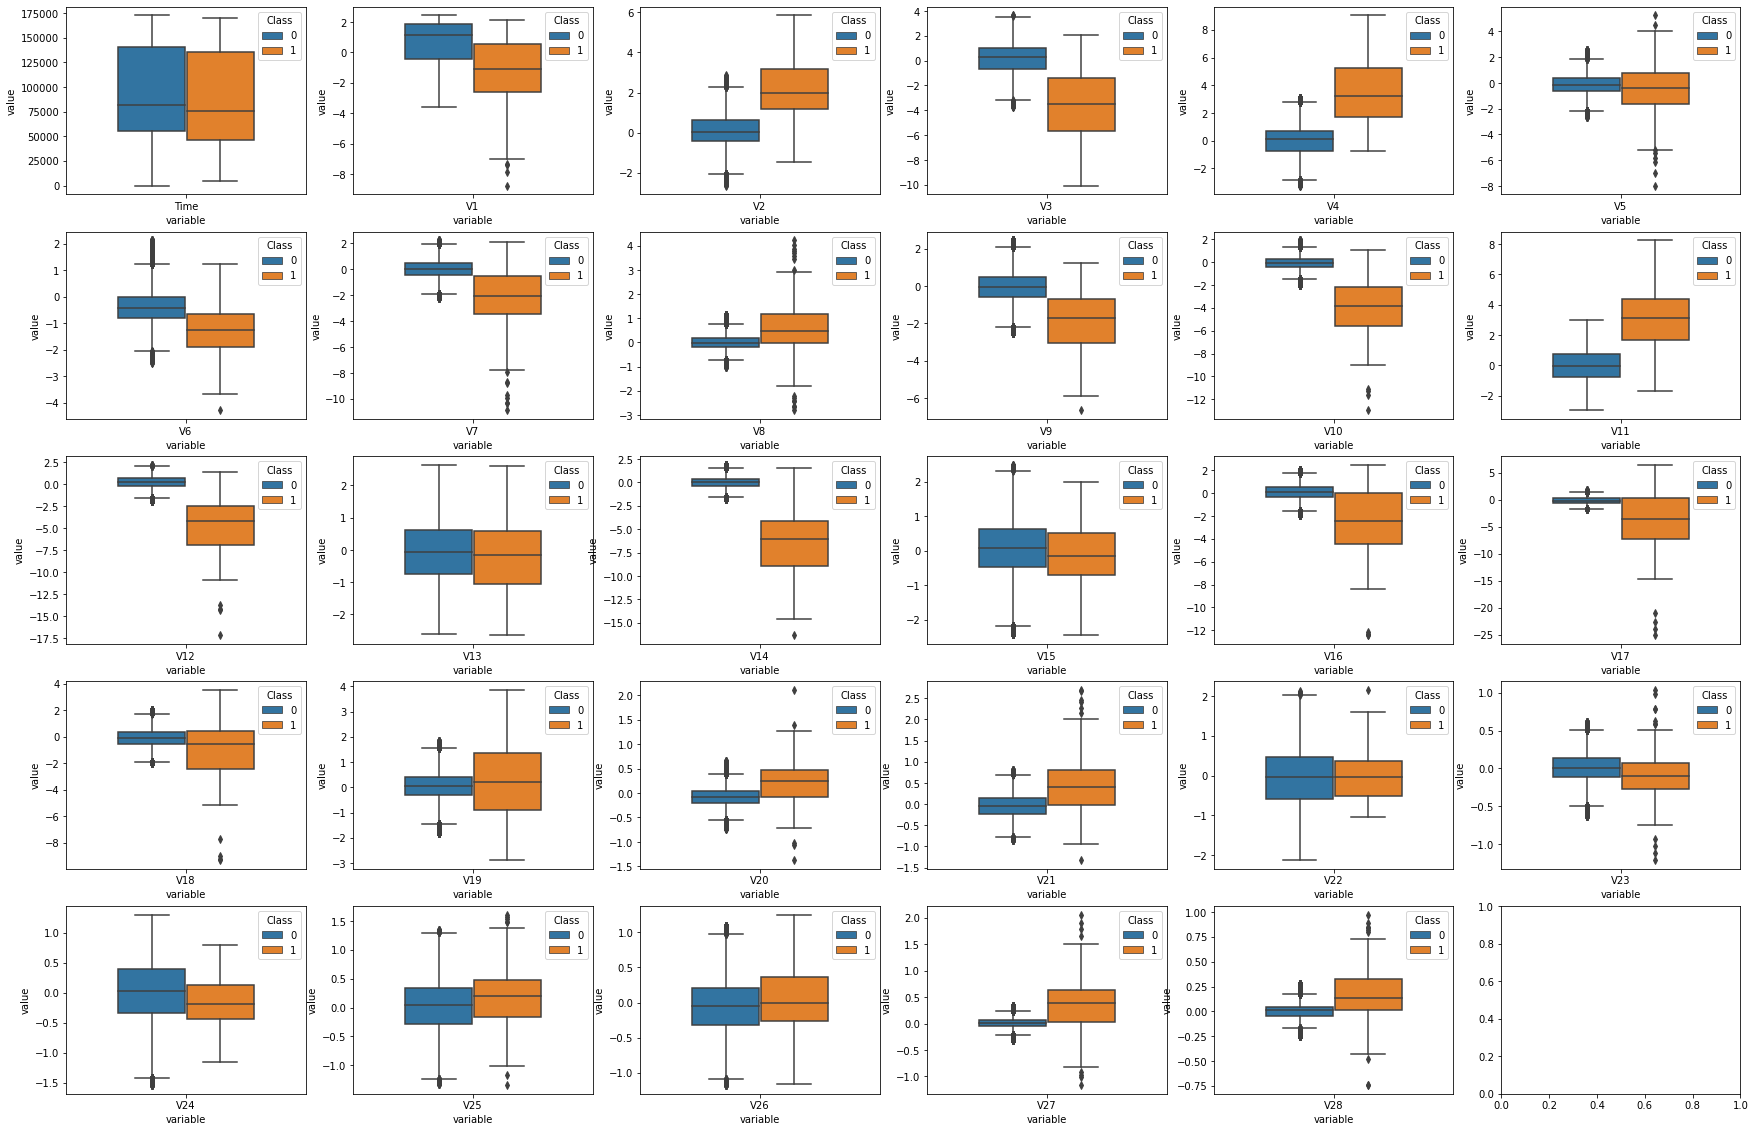

In [63]:
def showboxplot(df,features):
    melted=[]
    plt.figure()
    fig,ax=plt.subplots(5,6,figsize=(30,20))
    i=0
    for n in features:
        melted.insert(i,pd.melt(df,id_vars = "Class",value_vars = [n]))
        i+=1
    #print(melted[29])
    # print(len(melted))
    #print(np.arange(len(melted)+1))
    for s in np.arange(1,len(melted)):
        plt.subplot(5,6,s)
        sns.boxplot(x = "variable", y = "value", hue="Class",data= melted[s-1])
    plt.show()


showboxplot(a,a.columns.values[:-1])

In [64]:
y_train.value_counts()

Class
0        226600
1           380
dtype: int64

In [99]:
X_train = X_train.drop(['Class','Time'], axis=1)

In [100]:
from sklearn.preprocessing import StandardScaler

X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [67]:
type(X_train)

numpy.ndarray

In [68]:
# PCA
from sklearn.decomposition import PCA
def getFullPCAData(d):
    pca = PCA()
    pca_data = pca.fit_transform(d)
    return pca_data, pca.explained_variance_ratio_*100

def getPCAData(d, n_components=2):
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(d)
    return pca_data, pca.explained_variance_ratio_*100

In [69]:
def plotPCAVariations(pca_data,var):
    per_var = np.round(var, decimals=1)
    labels = ["PC"+str(x) for x in range(1,len(per_var)+1)]
    plt.figure(figsize=(20,6))
    plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
    plt.show()

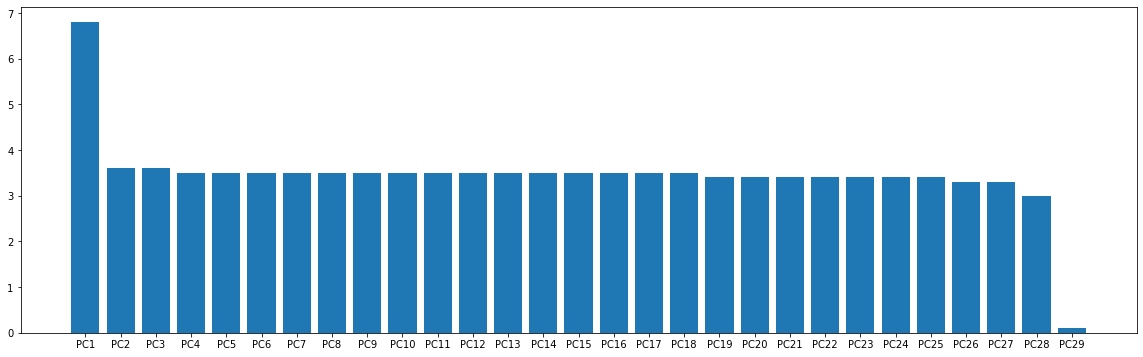

In [101]:
pca_data, var = getFullPCAData(X_train)
plotPCAVariations(pca_data,var)

In [94]:
pca_data

array([[-0.48708762, -1.64939152,  0.03405494, ..., -0.01270047,
         0.26148141,  0.02879897],
       [-0.36032488,  1.61462902, -0.31999412, ...,  0.102331  ,
        -0.72523685, -0.05852938],
       [-0.53309918, -1.06198899, -0.36599214, ..., -0.20778203,
        -0.41561676, -0.03063301],
       ...,
       [-0.41462703,  0.30311459, -0.33103763, ..., -0.42918338,
         0.09141527,  0.01095544],
       [10.93319415,  0.16177696,  4.65997932, ...,  0.11316791,
        -0.23387392, -0.45560501],
       [-0.41788995,  0.89560785,  0.04008198, ..., -0.04034073,
        -0.24319654,  0.01962107]])